In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.ticker as ticker

from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

loaded = np.load("../results/noisy_LR3.npz")

x = loaded["x"]
loss_full_label_list = loaded["loss_full_label_list"]
loss_random_list = loaded["loss_random_list"]
loss_top_list = loaded["loss_top_list"]

FileNotFoundError: [Errno 2] No such file or directory: '../results/noisy_LR3.npz'

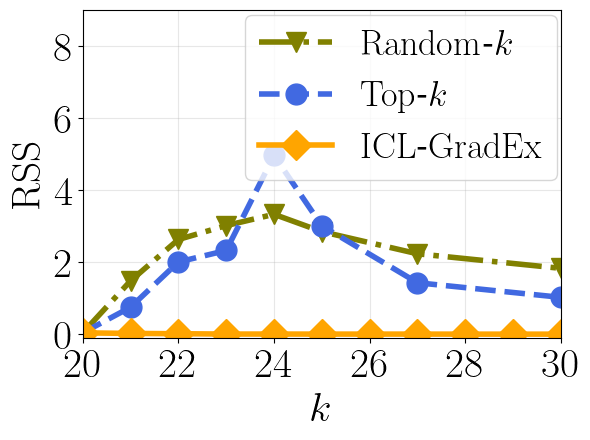

In [4]:
ours = np.array([0.03985721, 0.02375424, 0.0158153 , 0.00584555, 0.00614952,
       0.0047236 , 0.00483985, 0.00479242, 0.00360069, 0.00341583,
       0.00324319, 0.00223499, 0.00287833, 0.00240355, 0.0026171 ,
       0.00211989, 0.00238684, 0.00226683, 0.00285644, 0.00248   ,
       0.00224016])
ours_std = np.array([6.0678362e-03, 3.6058098e-03, 7.7704615e-03, 6.2318996e-04,
       8.1410364e-04, 1.0507845e-03, 9.1430155e-04, 1.9776769e-04,
       1.6114785e-05, 5.9248926e-04, 2.8357588e-04, 3.4604291e-05,
       3.8946708e-04, 3.8753738e-04, 8.3510444e-05, 2.7242579e-04,
       3.9261664e-04, 5.4074376e-04, 4.1587942e-04, 6.6299189e-04,
       2.5375228e-04])

top_k = np.array([0.03985721, 0.75061274, 2.00701   , 2.3257875 , 4.9623322 , 3.0105736 ,
       1.4301319 , 1.0247818 ])
top_k_std = np.array([6.0678362e-03, 0.2911786 , 2.4201221 , 0.92409945, 3.3728707 , 3.0219965 ,
       0.6215299 , 0.28533256])
random = np.array([0.03985721, 1.482804 , 2.6307886, 3.0167568, 3.3299701, 2.8484669, 2.2344897,
       1.8296156])
random_std = np.array([6.0678362e-03, 0.42941457, 0.53503966, 1.0597671 , 0.5518819 , 0.86524975,
       0.20749676, 0.14653604])
x = np.array([20, 21, 22, 23, 24, 25, 27, 30])



set_size_list = [1,2,3,4,5,7,10]
n_labeled = 20

fig, ax = plt.subplots(figsize=(6, 4.5))


#plt.plot(x, np.mean(loss_random_list, axis=0), lw=2, label="random")
#plt.fill_between(x, np.mean(loss_random_list, axis=0)-np.std(loss_random_list, axis=0), np.mean(loss_random_list, axis=0)+np.std(loss_random_list, axis=0), alpha=0.2)

plt.plot(x, random, lw=4, label=r"$\mathrm{Random}$-$k$", color="olive", linestyle="-.", markersize=15, marker="v")
plt.plot(x, top_k, lw=4, label=r"$\mathrm{Top}$-$k$", color="royalblue",  linestyle="--", markersize=15, marker="o")
# plt.fill_between(x, top_k-top_k_std, top_k+top_k_std, alpha=0.2)
# plt.fill_between(x, random-random_std, random+random_std, alpha=0.2)
x_full = np.arange(20, 41)
plt.plot(x_full, ours, lw=4, label=r"$\mathrm{ICL}$" + "-" + r"$\mathrm{GradEx}$", color="orange", markersize=15, marker="D")
plt.fill_between(x_full, ours-ours_std, ours+ours_std, alpha=0.2)

plt.xticks(fontsize=30)
plt.yticks(np.arange(0, 9, 2), fontsize=30)
plt.xlim(20, 30)
plt.ylim(-0.1, 9)


plt.legend(fontsize=26, loc='upper right', bbox_to_anchor=(1.03, 1.04))

# plt.title(r'$\mathrm{Linear~regresssion}$', fontsize=30)
plt.xlabel(r'$k$', fontsize=30)
plt.ylabel(r'$\mathrm{RSS}$', fontsize=30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./plot_topk_noisy_lr.pdf", format="pdf", dpi=1200)
plt.show()